In [19]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(84).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(44).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(245).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/6.jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(238).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(196).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(108).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(310).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image (5).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(186).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(29).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(140).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(224).jpg

In [20]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [21]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt

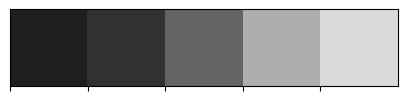

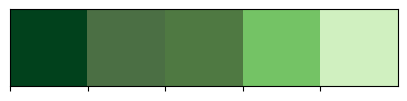

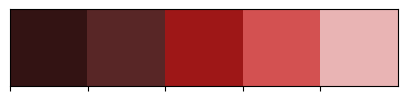

In [22]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

sns.palplot(colors_dark)
sns.palplot(colors_green)
sns.palplot(colors_red)


In [23]:
#Directory r modde koita category ache segular nam likhe dibo
labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']


In [24]:
#directory r sathe labelgula connect kore dibo

X_train = []
y_train = []
image_size = 150

#labelgular somosto image a giye(training set) eyy loop ta ghurte thakbe
for i in labels:
    #os.path.join func r modde 2ta argument(path,label) pathabo i.e 2 ta path join korbo karon directory r sathe labelgula connect krbo
    #training folderpath r modde label r valuegula chole gese
    folderPath = os.path.join('../input/brain-tumor-classification-mri','Training',i)
    print(folderPath)
    
    #folder r modder imagegula access korar jonno r ekta loop ekhanej=image
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        #print(img)
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('../input/brain-tumor-classification-mri','Testing',i)
    print(folderPath)
    
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)
        
X_train = np.array(X_train)
y_train = np.array(y_train)

../input/brain-tumor-classification-mri/Training/glioma_tumor


100%|██████████| 826/826 [00:03<00:00, 260.48it/s]


../input/brain-tumor-classification-mri/Training/no_tumor


100%|██████████| 395/395 [00:01<00:00, 339.62it/s]


../input/brain-tumor-classification-mri/Training/meningioma_tumor


100%|██████████| 822/822 [00:02<00:00, 282.90it/s]


../input/brain-tumor-classification-mri/Training/pituitary_tumor


100%|██████████| 827/827 [00:03<00:00, 260.46it/s]


../input/brain-tumor-classification-mri/Testing/glioma_tumor


100%|██████████| 100/100 [00:00<00:00, 287.43it/s]


../input/brain-tumor-classification-mri/Testing/no_tumor


100%|██████████| 105/105 [00:00<00:00, 544.36it/s]


../input/brain-tumor-classification-mri/Testing/meningioma_tumor


100%|██████████| 115/115 [00:00<00:00, 296.96it/s]


../input/brain-tumor-classification-mri/Testing/pituitary_tumor


100%|██████████| 74/74 [00:00<00:00, 149.21it/s]


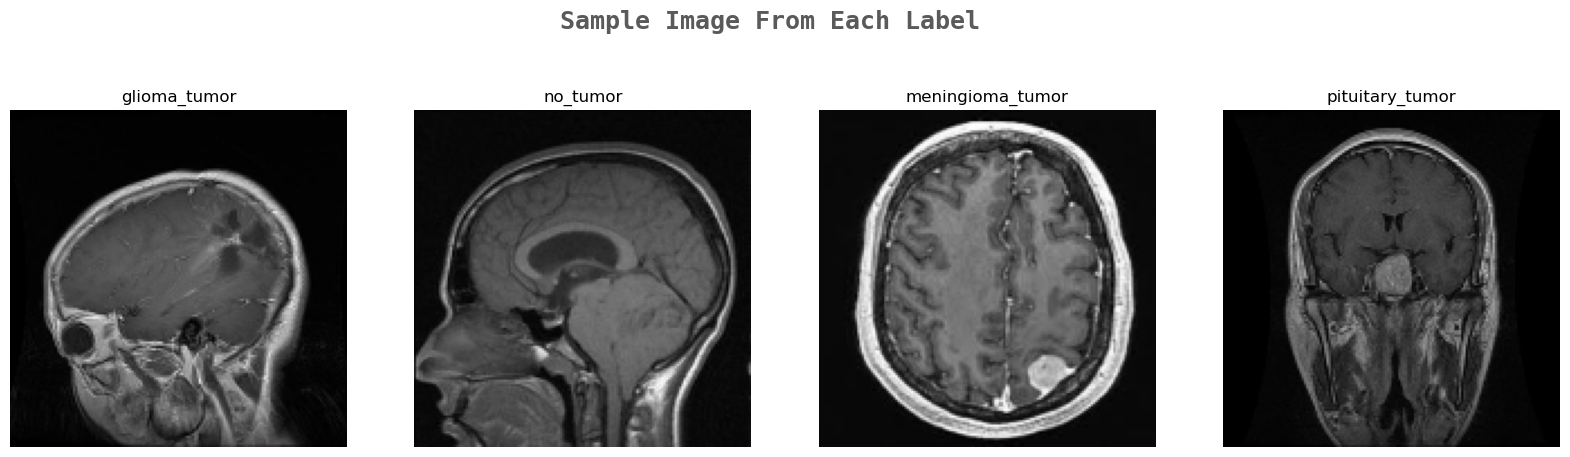

In [25]:
k=0
fig, ax = plt.subplots(1,4,figsize=(20,20))
fig.text(s='Sample Image From Each Label',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.62,x=0.4,alpha=0.8)
for i in labels:
    j=0
    while True :
        if y_train[j]==i:
            ax[k].imshow(X_train[j])
            ax[k].set_title(y_train[j])
            ax[k].axis('off')
            k+=1
            break
        j+=1


In [26]:
X_train, y_train = shuffle(X_train,y_train, random_state=101)

In [27]:
X_train.shape

(3264, 150, 150, 3)

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train,test_size=0.1,random_state=101)

In [29]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
from tensorflow.keras.utils import plot_model









In [31]:
# Define your model architecture
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(4,activation='softmax'))

In [32]:
# model=Sequential()
# model.add( Conv2D(32,(3,3),input_shape=X_train.shape[1:],activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Flatten())
# model.add(Dense(4,activation='softmax'))



In [33]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

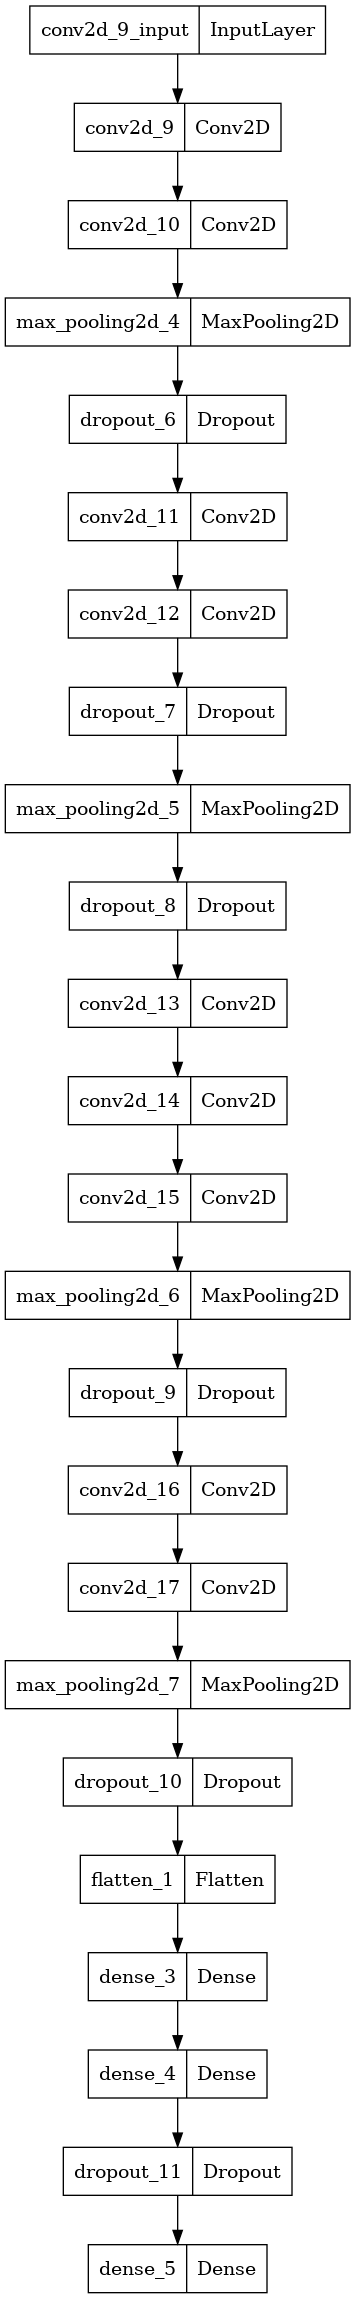

In [34]:
plot_model(model)

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 conv2d_10 (Conv2D)          (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 73, 73, 64)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 71, 71, 64)        36928     
                                                                 
 conv2d_12 (Conv2D)          (None, 69, 69, 64)        36928     
                                                      

In [36]:
history = model.fit(X_train,y_train,epochs=100,validation_split=0.1)







Epoch 1/100


2023-06-09 12:58:01.272290: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout_6/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


83/83 [==============================] - 8s 55ms/step - loss: 1.5150 - accuracy: 0.3027 - val_loss: 1.3427 - val_accuracy: 0.2823
Epoch 2/100
83/83 [==============================] - 4s 53ms/step - loss: 1.2313 - accuracy: 0.4321 - val_loss: 1.0241 - val_accuracy: 0.5442
Epoch 3/100
83/83 [==============================] - 4s 51ms/step - loss: 0.9314 - accuracy: 0.5963 - val_loss: 0.8357 - val_accuracy: 0.6463
Epoch 4/100
83/83 [==============================] - 4s 51ms/step - loss: 0.7894 - accuracy: 0.6530 - val_loss: 0.7839 - val_accuracy: 0.6565
Epoch 5/100
83/83 [==============================] - 4s 52ms/step - loss: 0.6541 - accuracy: 0.7227 - val_loss: 0.6242 - val_accuracy: 0.7551
Epoch 6/100
83/83 [==============================] - 4s 51ms/step - loss: 0.5473 - accuracy: 0.7809 - val_loss: 0.5852 - val_accuracy: 0.7687
Epoch 7/100
83/83 [==============================] - 4s 51ms/step - loss: 0.4395 - accuracy: 0.8278 - val_loss: 0.4587 - val_accuracy: 0.8435
Epoch 8/100
83/83 

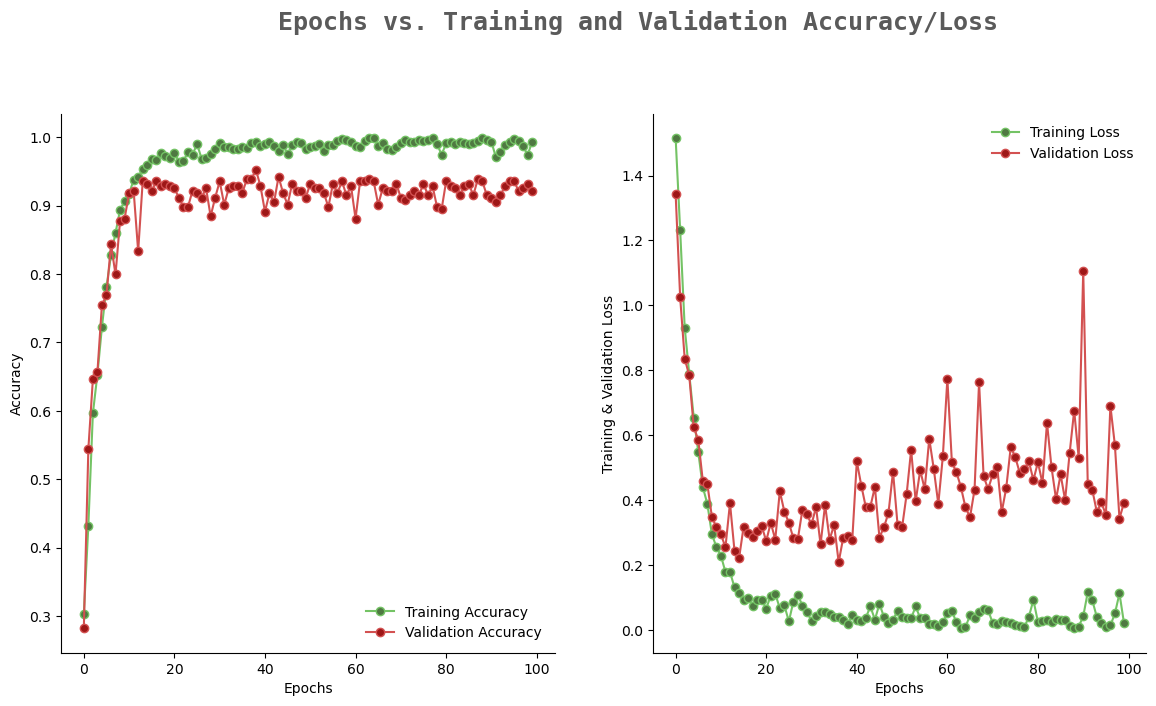

In [37]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

epochs = [i for i in range(100)]
fig, ax = plt.subplots(1, 2, figsize=(14, 7))
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

fig.text(s='Epochs vs. Training and Validation Accuracy/Loss', size=18, fontweight='bold',
         fontname='monospace', color=colors_dark[1], y=1, x=0.28, alpha=0.8)

sns.despine()
ax[0].plot(epochs, train_acc, marker='o', markerfacecolor=colors_green[2], color=colors_green[3],
           label='Training Accuracy')
ax[0].plot(epochs, val_acc, marker='o', markerfacecolor=colors_red[2], color=colors_red[3],
           label='Validation Accuracy')
ax[0].legend(frameon=False)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

sns.despine()
ax[1].plot(epochs, train_loss, marker='o', markerfacecolor=colors_green[2], color=colors_green[3],
           label='Training Loss')
ax[1].plot(epochs, val_loss, marker='o', markerfacecolor=colors_red[2], color=colors_red[3],
           label='Validation Loss')
ax[1].legend(frameon=False)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training & Validation Loss')

plt.show()


In [38]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

11/11 [==============================] - 0s 28ms/step


In [39]:
from sklearn.metrics import classification_report

print(classification_report(y_test_new, pred))


              precision    recall  f1-score   support

           0       0.93      0.85      0.89        93
           1       0.88      0.88      0.88        51
           2       0.92      0.91      0.91        96
           3       0.91      1.00      0.95        87

    accuracy                           0.91       327
   macro avg       0.91      0.91      0.91       327
weighted avg       0.91      0.91      0.91       327



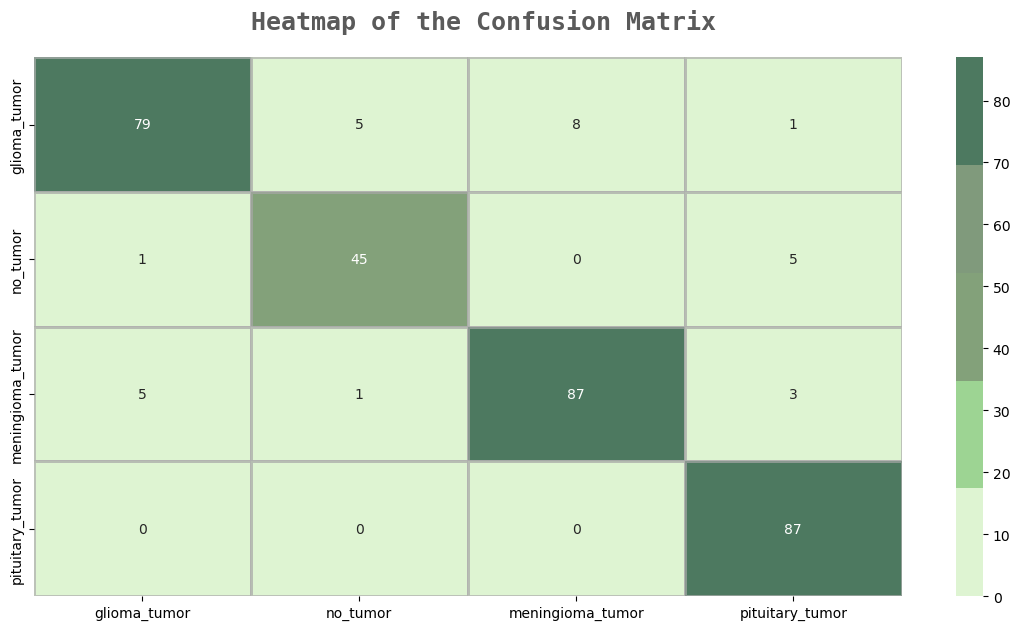

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_test_new, pred)

fig, ax = plt.subplots(1, 1, figsize=(14, 7))
sns.heatmap(conf_mat, ax=ax, xticklabels=labels, yticklabels=labels, annot=True,
            cmap=colors_green[::-1], alpha=0.7, linewidths=2, linecolor=colors_dark[3])
fig.text(s='Heatmap of the Confusion Matrix', size=18, fontweight='bold',
         fontname='monospace', color=colors_dark[1], y=0.92, x=0.28, alpha=0.8)

plt.show()
